## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [2]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from tensorflow.keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from tensorflow.keras.callbacks import ModelCheckpoint

model_ckpt_true = ModelCheckpoint(filepath="./tmpt.h5", 
                             monitor="val_loss", 
                             save_best_only=True)
model_ckpt_false = ModelCheckpoint(filepath="./tmpf.h5", 
                             monitor="val_loss", 
                             save_best_only=False)
MODEL_CKPT=[model_ckpt_true,model_ckpt_false]
FILEPATH=["./tmpt.h5","./tmpf.h5"]
results = {}
loss_loadback = {}
acc_loadback = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for model_ckpt,filepath in zip(MODEL_CKPT,FILEPATH):
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = str(filepath)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    # Load back
    model = keras.models.load_model(filepath)
    loss_loadback[exp_name_tag], acc_loadback[exp_name_tag] = model.evaluate(x_test, y_test)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v2_4 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_v2_5 (Ba (None, 128)               512 

50000/50000 [==============================] - 7s 135us/sample - loss: 0.5795 - accuracy: 0.8270 - val_loss: 1.6096 - val_accuracy: 0.4859
Epoch 46/50
50000/50000 [==============================] - 7s 146us/sample - loss: 0.5637 - accuracy: 0.8328 - val_loss: 1.6220 - val_accuracy: 0.4832
Epoch 47/50
50000/50000 [==============================] - 9s 171us/sample - loss: 0.5474 - accuracy: 0.8389 - val_loss: 1.6304 - val_accuracy: 0.4856
Epoch 48/50
50000/50000 [==============================] - 9s 172us/sample - loss: 0.5322 - accuracy: 0.8443 - val_loss: 1.6529 - val_accuracy: 0.4886
Epoch 49/50
50000/50000 [==============================] - 8s 151us/sample - loss: 0.5143 - accuracy: 0.8532 - val_loss: 1.6619 - val_accuracy: 0.4867
Epoch 50/50
10000/10000 [==============================] - 2s 182us/sample - loss: 1.4465 - accuracy: 0.4878
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

50000/50000 [==============================] - 12s 245us/sample - loss: 0.6779 - accuracy: 0.7907 - val_loss: 1.5823 - val_accuracy: 0.4867
Epoch 40/50
50000/50000 [==============================] - 13s 261us/sample - loss: 0.6572 - accuracy: 0.7991 - val_loss: 1.5940 - val_accuracy: 0.4916
Epoch 41/50
50000/50000 [==============================] - 13s 253us/sample - loss: 0.6395 - accuracy: 0.8061 - val_loss: 1.6000 - val_accuracy: 0.4890
Epoch 42/50
50000/50000 [==============================] - 13s 251us/sample - loss: 0.6206 - accuracy: 0.8135 - val_loss: 1.6086 - val_accuracy: 0.4903
Epoch 43/50
50000/50000 [==============================] - 12s 250us/sample - loss: 0.6023 - accuracy: 0.8202 - val_loss: 1.6124 - val_accuracy: 0.4891
Epoch 44/50
50000/50000 [==============================] - 13s 251us/sample - loss: 0.5846 - accuracy: 0.8288 - val_loss: 1.6191 - val_accuracy: 0.4915
Epoch 45/50
50000/50000 [==============================] - 13s 254us/sample - loss: 0.5683 - accurac

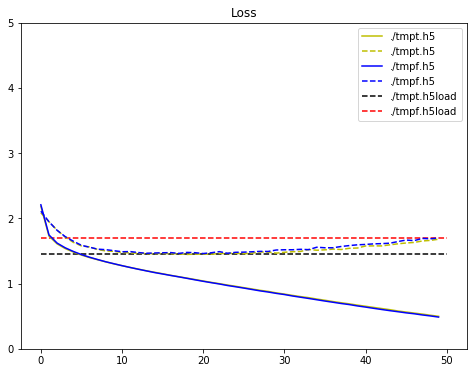

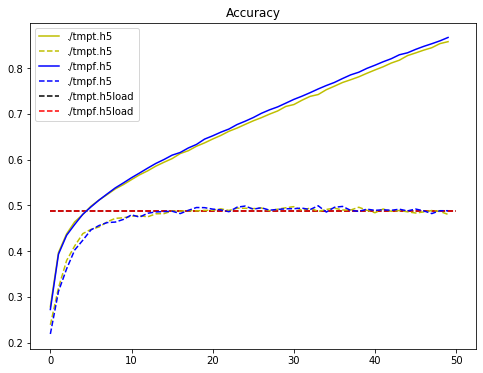

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["y", "b","k","red"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=loss_loadback[cond], xmin=0, xmax=len(train_loss), colors=color_bar[i+2], linestyles='--',label=cond+"load")
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=acc_loadback[cond], xmin=0, xmax=len(train_loss), colors=color_bar[i+2], linestyles='--',label=cond+"load")
plt.title("Accuracy")
plt.legend()
plt.show()